In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt


from helpers import *
from implementations import *
from plots import *

%load_ext autoreload
%autoreload 2

## Load the Data
Note that `ratings` is a sparse matrix that in the shape of (num_items, num_users)

In [2]:
path_dataset = "data_train.csv"
ratings = load_data(path_dataset)
ratings.shape

number of items: 10000, number of users: 1000


(10000, 1000)

## Exploratory Data Analysis

### Calculate mean and std per user

In [3]:
user_means, user_stds = calculate_statistics_per_user(ratings)

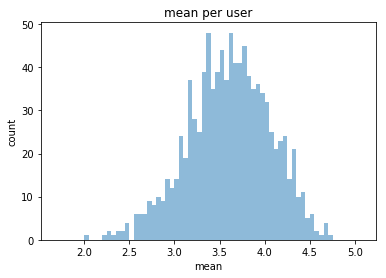

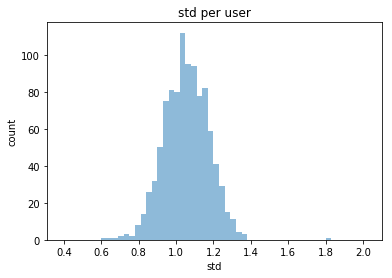

Total number of nonzero elements in origial data:1176952


In [4]:
plot_mean_and_std_per_user(user_means, user_stds)
print("Total number of nonzero elements in origial data:{v}".format(v=ratings.nnz))

### Plot the number of ratings per movie and user

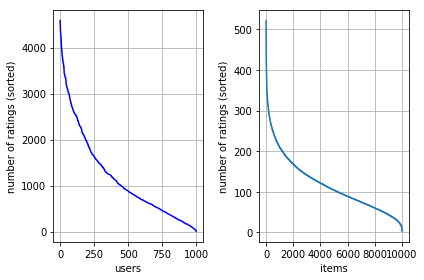

min # of items per user = 8, min # of users per item = 3.


In [5]:
num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

## Spliting the data into a train and test set

the shape of original ratings. (# of row, # of col): (10000, 1000)
the shape of valid ratings. (# of row, # of col): (9990, 999)
Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1065253
Total number of nonzero elements in test data:111620


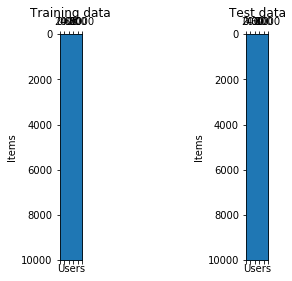

In [6]:
valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings=10, p_test=0.1)

plot_train_test_data(train, test)

## Implementing Baselines 

### Use the global mean to do the prediction

In [7]:
baseline_global_mean(train, test)

test RMSE of baseline using the global mean: [[1.12152228]].


### Use the user means as the prediction

In [8]:
baseline_user_mean(train, test)

test RMSE of the baseline using the user mean: [[1.03317038]].


### Use the item means as the prediction

In [9]:
baseline_item_mean(train, test)

test RMSE of the baseline using the item mean: [[1.09633198]].


In [17]:
# Hyperparameters
gamma = 0.008
num_features = 10   # K is the number of latent features.
lambda_user = 0.09
lambda_item = 0.55
num_epochs = 30     # number of full passes through the train set
matrix_factorization_SGD(train, test, gamma, num_features, lambda_user, lambda_item, num_epochs)  

learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0276067386068355.
iter: 1, RMSE on training set: 1.0138078033916247.
iter: 2, RMSE on training set: 1.0054774350711884.
iter: 3, RMSE on training set: 1.0005797451781122.
iter: 4, RMSE on training set: 0.9958569660135325.
iter: 5, RMSE on training set: 0.9923157740736128.
iter: 6, RMSE on training set: 0.9891042995730303.
iter: 7, RMSE on training set: 0.9872220244212702.
iter: 8, RMSE on training set: 0.9845965384049428.
iter: 9, RMSE on training set: 0.9830031595561252.
iter: 10, RMSE on training set: 0.9821848569512096.
iter: 11, RMSE on training set: 0.9807776417314736.
iter: 12, RMSE on training set: 0.9795303117080761.
iter: 13, RMSE on training set: 0.9787852488344868.
iter: 14, RMSE on training set: 0.9780222905868649.
iter: 15, RMSE on training set: 0.9773025707805916.
iter: 16, RMSE on training set: 0.9768928335964161.
iter: 17, RMSE on training set: 0.9764957287305732.
iter: 18, RMSE on training set

,User,Movie,Rating
0,67,1,2.789335
1,108,1,3.324270
2,410,1,3.360256
3,457,1,2.803596
4,1337,1,2.928321
5,1526,1,3.176105
6,1621,1,4.021693
7,2426,1,3.033331
8,2878,1,3.020800
9,2937,1,3.289319


## Learning the Matrix Factorization using SGD

In [10]:
# Hyperparameters
gamma = 0.008
num_features = 10   # K is the number of latent features.
lambda_user = 0.03
lambda_item = 0.35
num_epochs = 30     # number of full passes through the train set
train= load_data('data_train.csv')
test = load_data('sample_submission.csv')
modelix = matrix_factorization_SGD(train, test, gamma, num_features, lambda_user, lambda_item, num_epochs)  

number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0296727386980808.
iter: 1, RMSE on training set: 1.0130577042722326.
iter: 2, RMSE on training set: 1.006376639491076.
iter: 3, RMSE on training set: 1.0002397207780758.
iter: 4, RMSE on training set: 0.9970379038747211.
iter: 5, RMSE on training set: 0.9931772051942266.
iter: 6, RMSE on training set: 0.9895947897776093.
iter: 7, RMSE on training set: 0.9873198103303624.
iter: 8, RMSE on training set: 0.9855072372106691.
iter: 9, RMSE on training set: 0.983473418419248.
iter: 10, RMSE on training set: 0.9815428680123676.
iter: 11, RMSE on training set: 0.9806755098153277.
iter: 12, RMSE on training set: 0.9795951066055664.
iter: 13, RMSE on training set: 0.9790251709524429.
iter: 14, RMSE on training set: 0.9781140107032218.
iter: 15, RMSE on training set: 0.977581704157987.
iter: 16, RMSE on training set: 0.97717233322

## Learning the Matrix Factorization using Alternating Least Squares

In [29]:
# Hyperparameters
spark_context=sc 
rank=8
lambda_ = 0.081
iterations = 24
predictions_ALS(train, test, spark_context, rank, lambda_, iterations)

[autoreload of implementations failed: Traceback (most recent call last):
  File "C:\Users\Ayse\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Ayse\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 368, in superreload
    module = reload(module)
  File "C:\Users\Ayse\Anaconda3\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "C:\Users\Ayse\Anaconda3\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\EPFL\ML\ML-Project-2-Rec-Sys\implementations.py", line 326, in <module>
    findspark.init()
  File "C:\Users\Ayse\Anaconda3\lib\site-packages\findspark.py", line 122, in init
    spark_home = find()


NameError: name 'sc' is not defined

In [23]:
# Hyperparameters
num_features = 10   # K in the lecture notes
lambda_user = 0.15
lambda_item = 0.75
stop_criterion = 1e-5

matrix_factorization_ALS(train, test, num_features, lambda_user, lambda_item, stop_criterion)


start the ALS algorithm...
RMSE on training set: 2.0490560298374145.
RMSE on training set: 1.281723107484919.
RMSE on training set: 1.1556544986936916.
RMSE on training set: 1.1061716397417714.
RMSE on training set: 1.0818573443078556.
RMSE on training set: 1.0683902570025605.
RMSE on training set: 1.0603705335921554.
RMSE on training set: 1.0553684134271628.
RMSE on training set: 1.0521520863663794.
RMSE on training set: 1.0500415968614552.
RMSE on training set: 1.048637666869377.
RMSE on training set: 1.0476950577986681.
RMSE on training set: 1.047058183094562.
RMSE on training set: 1.0466260262334692.
RMSE on training set: 1.0463319214885776.
RMSE on training set: 1.046131366835925.
RMSE on training set: 1.0459944179581004.
RMSE on training set: 1.045900814622603.
RMSE on training set: 1.0458367965193838.
RMSE on training set: 1.045792993401999.
RMSE on training set: 1.04576301297401.
RMSE on training set: 1.0457424890660767.
RMSE on training set: 1.0457284368919793.
RMSE on traini

In [11]:
def submission_table(original_df, col_userID, col_movie, col_rate):
    """ return table according with Kaggle convention """

    def id(row):
        return 'r' + str(int(row[col_userID])) + '_c' + str(int(row[col_movie]))

    def pred(row):
        return row[col_rate]

    df = pd.DataFrame.copy(original_df)
    df['Id'] = df.apply(id, axis=1)
    df['Prediction'] = df.apply(pred, axis=1)

    return df[['Id', 'Prediction']]


In [28]:
submission = submission_table(modelix , 'User', 'Movie', 'Rating')

In [36]:
pre =  np.array(submission['Prediction'])

In [37]:
pre[np.where(pre>5)]=5

In [38]:
pre[np.where(pre<1)]=1

In [41]:
submission.Prediction =np.round(pre).astype(int)

In [43]:
file_name = 'prediction2.csv'
submission.to_csv(file_name, index=False)